In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl

import requests

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

mpl.rcParams["axes.unicode_minus"]= False

In [2]:
train = pd.read_csv('C:\\Users\\User\\Desktop\\jeju\\201901-202003.csv')

In [3]:
train.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [29]:
train["CARD_CCG_NM"].fillna("세종시", inplace=True)
train["HOM_CCG_NM"].fillna("세종시", inplace=True)

In [30]:
train["REG_YYMM"].astype(str)

0           201901
1           201901
2           201901
3           201901
4           201901
             ...  
24697787    202003
24697788    202003
24697789    202003
24697790    202003
24697791    202003
Name: REG_YYMM, Length: 24697792, dtype: object

In [31]:
train.isnull().sum()

# CARD_CCG_NM 카드이용지역 _시군구
# HOM_CCG_NM 거주지역_시군구

REG_YYMM        0
CARD_SIDO_NM    0
CARD_CCG_NM     0
STD_CLSS_NM     0
HOM_SIDO_NM     0
HOM_CCG_NM      0
AGE             0
SEX_CTGO_CD     0
FLC             0
CSTMR_CNT       0
AMT             0
CNT             0
year            0
month           0
year_month      0
dtype: int64

In [32]:
# cols = ['CARD_SIDO_NM','CARD_CCG_NM','STD_CLSS_NM','HOM_SIDO_NM','HOM_CCG_NM','AGE','SEX_CTGO_CD','FLC','CSTMR_CNT','CNT']
# train.drop(cols, axis=1, inplace=True)


In [33]:
# train["REG_YYMM"].astype(int)

In [34]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

def grap_year_month(data):
    data = str(data)
    return str(data[:4] + "-" + data[4:])

In [35]:
train['year'] = train['REG_YYMM'].apply(lambda x: grap_year(x))
train['month'] = train['REG_YYMM'].apply(lambda x: grap_month(x))
train["year_month"] = train["REG_YYMM"].apply(lambda x : grap_year_month(x))

In [36]:
train.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month,year_month
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019,1,2019-01
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019,1,2019-01
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,2019,1,2019-01
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,2019,1,2019-01
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,2019,1,2019-01


In [55]:
train_amt = train.groupby('year_month')['AMT'].sum().reset_index()

In [56]:
pd.options.display.float_format = '{:.5f}'.format

In [57]:
train_amt.head()

,year_month,AMT
0,2019-01,4052317259025
1,2019-02,3634345832156
2,2019-03,4105409759731
3,2019-04,4006698507386
4,2019-05,4345471235813


In [58]:
train_amt = train_amt.set_index('year_month')

In [59]:
train_amt.index

Index(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03'],
      dtype='object', name='year_month')

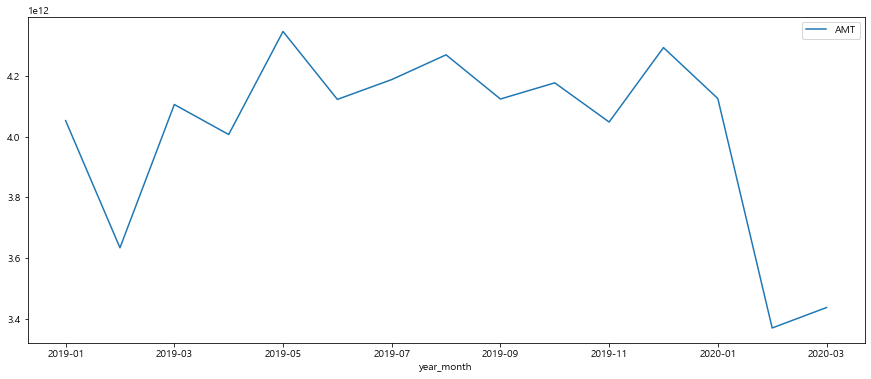

In [60]:
train_amt.plot(figsize = (15,6))
plt.show()

In [43]:
std_class_amt=train[['year_month','STD_CLSS_NM','AMT']].groupby(['STD_CLSS_NM','year_month']).sum()

In [44]:
std_class_amt

AMT
STD_CLSS_NM year_month            
건강보조식품 소매업  2019-01     8605074944
            2019-02     7695979668
            2019-03     6307887107
            2019-04     6189621059
            2019-05     7930621122
...                            ...
휴양콘도 운영업    2019-11     3333090812
            2019-12     5293795864
            2020-01     8873863619
            2020-02     3317926290
            2020-03     1093634463

[615 rows x 1 columns]

In [45]:
trainh=train.pivot_table(index="year_month",columns="STD_CLSS_NM",values="AMT",aggfunc="sum")
trainh

STD_CLSS_NM,건강보조식품 소매업,골프장 운영업,과실 및 채소 소매업,관광 민예품 및 선물용품 소매업,그외 기타 분류안된 오락관련 서비스업,그외 기타 스포츠시설 운영업,그외 기타 종합 소매업,기타 대형 종합 소매업,기타 수상오락 서비스업,기타 외국식 음식점업,...,중식 음식점업,차량용 가스 충전업,차량용 주유소 운영업,체인화 편의점,택시 운송업,피자 햄버거 샌드위치 및 유사 음식점업,한식 음식점업,호텔업,화장품 및 방향제 소매업,휴양콘도 운영업
year_month,,,,,,,,,,,,,,,,,,,,,
2019-01,8605074944,11968748603,44453112689,955750428,1017500,305925950,73748981612,538843857358,127107192,45665083827,...,62665004697,16846765168,483447902660,316314464923,107747926483,75362999290,944187262326,19810557915,49431741234,8224321688
2019-02,7695979668,16172821771,41217254299,836063298,2171200,261992400,65240336771,484343025141,106949630,38572881680,...,59172364534,14862983953,420183533685,283482039151,100387649746,68454177238,828212673196,15695213582,42678743429,6104431321
2019-03,6307887107,42108966385,38415185909,1018056196,2005500,231791910,63325621140,517323547314,112604480,45944677941,...,67840648226,16468348269,499290480565,343297549867,112410966348,75701534533,979787456428,13817431974,48695291945,3378598195
2019-04,6189621059,51594105911,37929318326,1132707516,1945000,146125100,61642072463,494817697752,109081230,43459624678,...,63756965708,15366221250,500426190266,339368118284,119090676693,75046904161,929119635382,13639159307,46289777960,2854341346
2019-05,7930621122,61560857446,40109803493,1227161510,2431000,179603820,68730852590,524741382417,141142205,43973488460,...,68027851961,16826179031,554833565580,377219352474,123211255186,79222053101,1015171813989,16165528501,48756280366,4357229972
2019-06,6235724774,60816504109,37596533926,1078516132,3294000,198211860,63218879351,470795799066,138045750,40876110018,...,65109670937,16217769932,521482750657,381391802266,115315039720,77478178376,960618569071,13652917977,45758001314,4185033466
2019-07,5812021661,51603437320,34722470972,947813541,3229370,180582528,63769792145,504817794698,147046573,41933644755,...,67091569114,15490004307,516825325346,386928614266,130881819332,80015933980,981571628843,14091286013,43701126839,7140818167
2019-08,5825692808,47137504416,39038864865,1209506009,6102670,242269649,67608321538,491858368373,174004536,42239281833,...,65797678657,16117616604,559073100080,393665691278,123702244107,79914002567,1010730528577,18614699092,42823670953,13121845211
2019-09,9824964625,47971421728,49636213189,888723804,4345650,159768830,75869764181,513691411678,129194820,40153057754,...,61776234983,14773738361,515931587383,379784587604,125292165688,73474585461,889663829822,12732299741,40055857449,3764060856


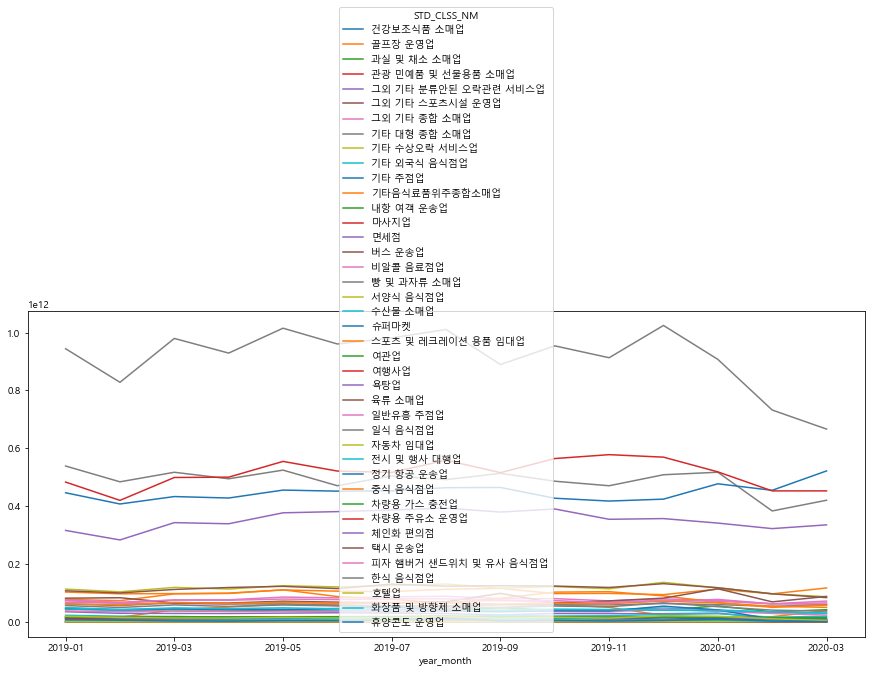

In [46]:
trainh.plot(figsize = (15,6))
plt.show()

In [47]:
CLSS_NM_uniq=train['STD_CLSS_NM'].unique()

C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.f

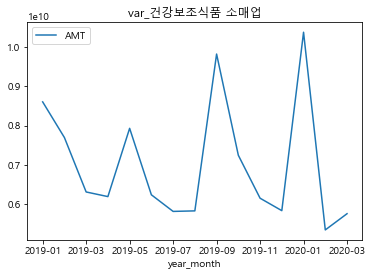

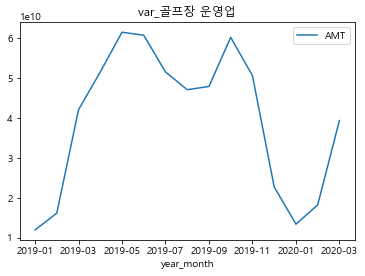

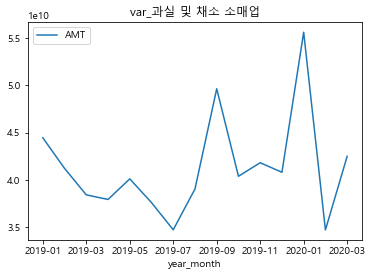

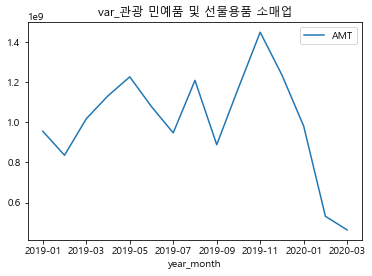

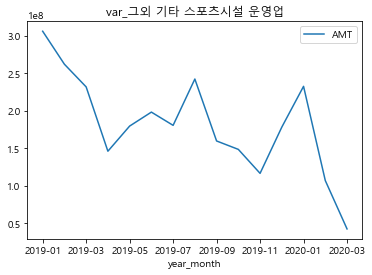

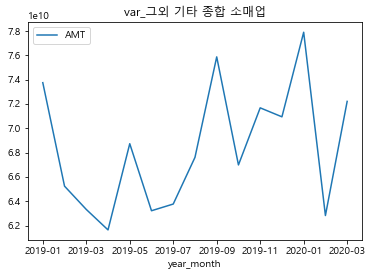

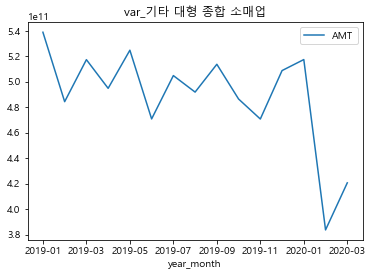

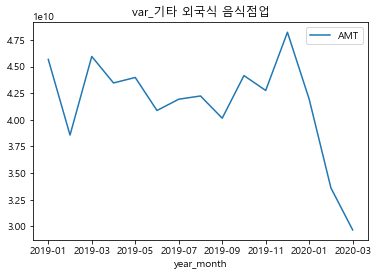

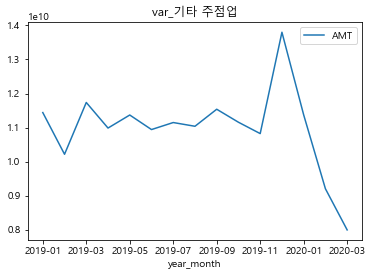

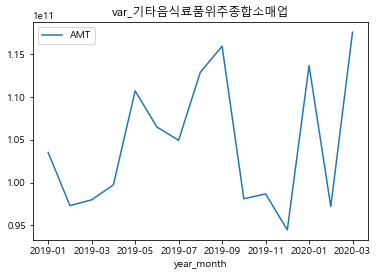

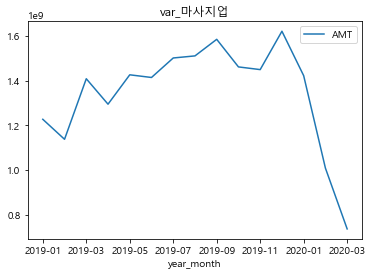

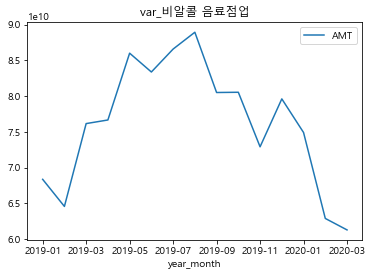

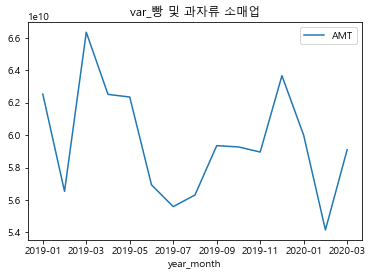

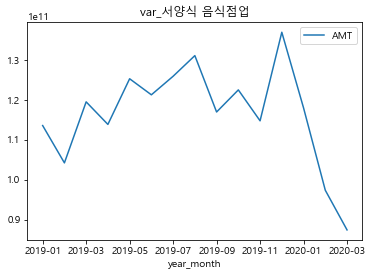

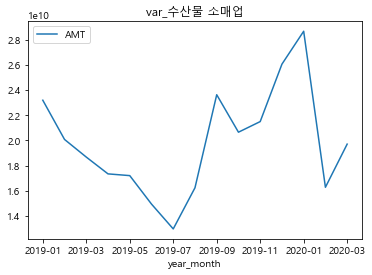

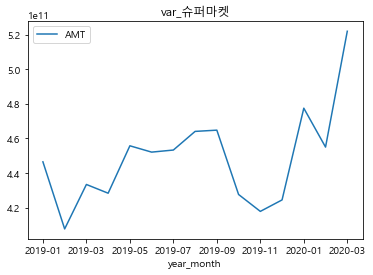

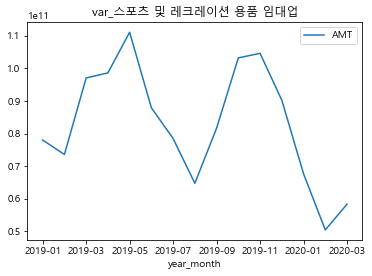

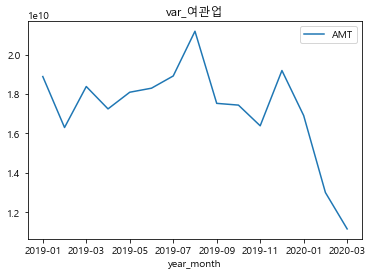

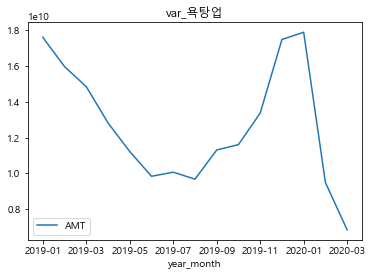

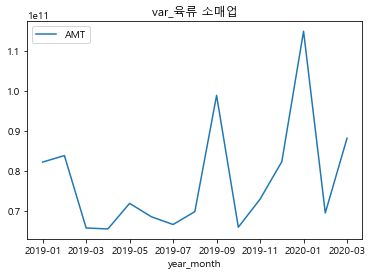

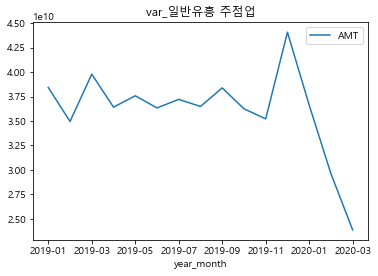

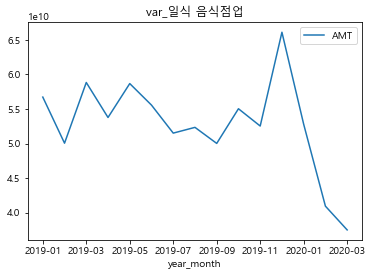

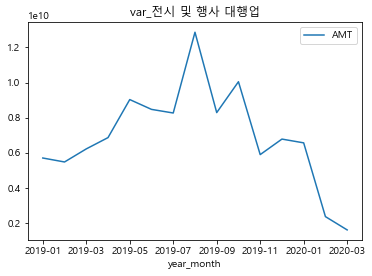

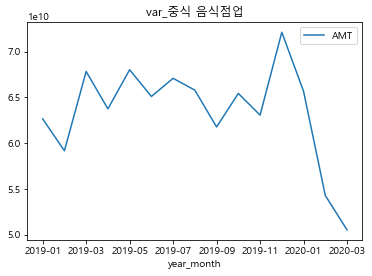

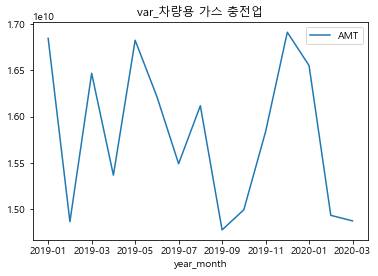

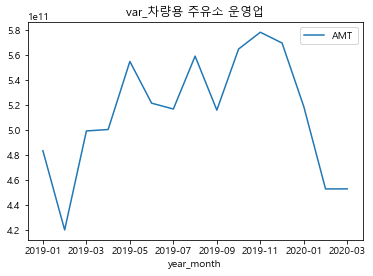

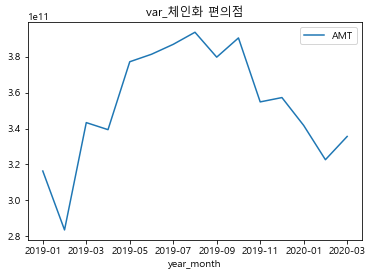

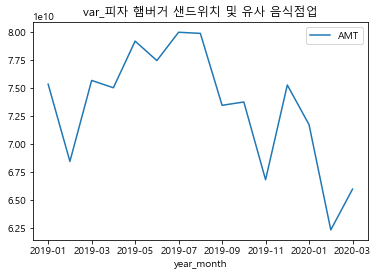

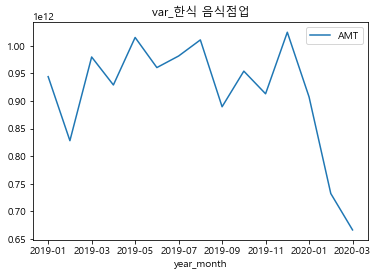

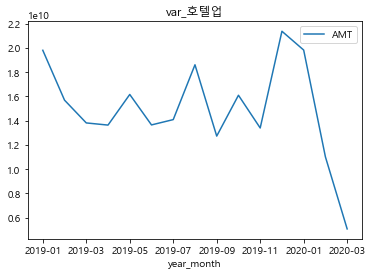

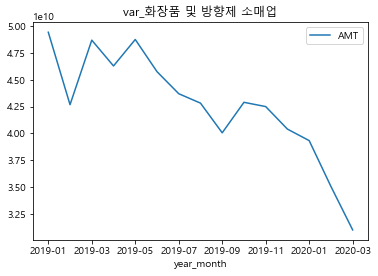

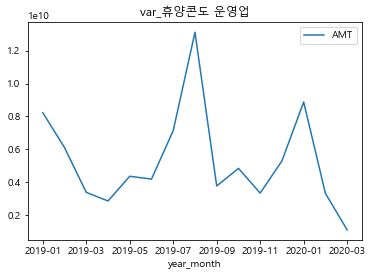

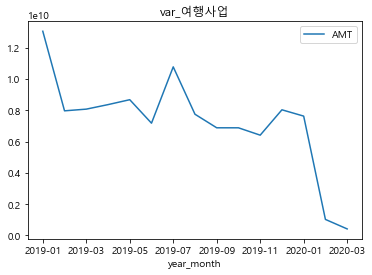

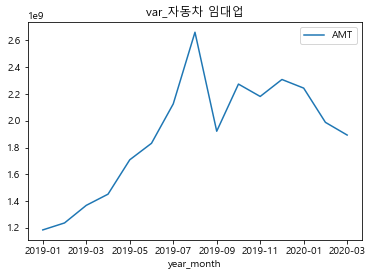

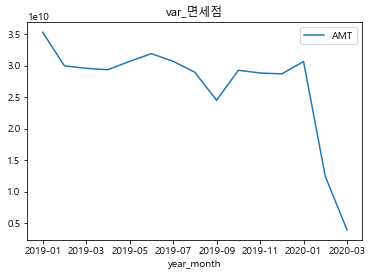

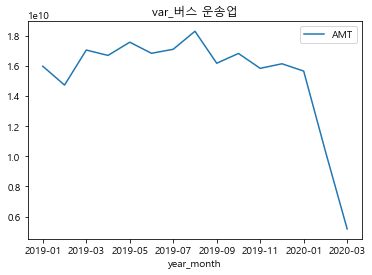

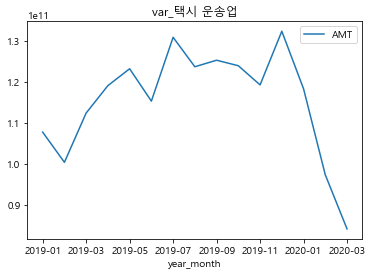

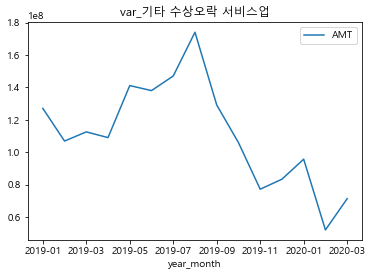

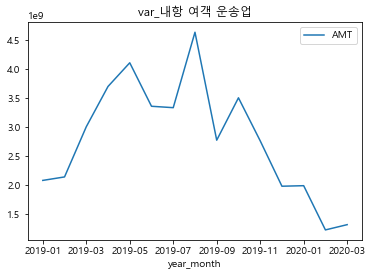

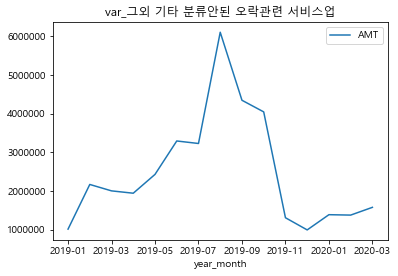

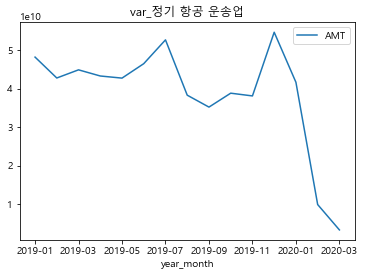

In [48]:
a=[]
b=[]
for i in CLSS_NM_uniq :
#     print('var_{}'.format(i))
    a.append('var_{}'.format(i))
    b.append('var_{}'.format(i))

for i in range(len(CLSS_NM_uniq)) :
    c=b[i]    
    a[i]=std_class_amt.loc[CLSS_NM_uniq[i]]
    
    
    a[i].plot(kind='line')
    
    plt.title(c)

In [49]:
std_class_amt_mean=train[['year_month','STD_CLSS_NM','AMT']].groupby(['STD_CLSS_NM','year_month']).mean()

In [50]:
trainc=train.pivot_table(index="year_month",columns="STD_CLSS_NM",values="AMT",aggfunc="mean")
trainc

STD_CLSS_NM,건강보조식품 소매업,골프장 운영업,과실 및 채소 소매업,관광 민예품 및 선물용품 소매업,그외 기타 분류안된 오락관련 서비스업,그외 기타 스포츠시설 운영업,그외 기타 종합 소매업,기타 대형 종합 소매업,기타 수상오락 서비스업,기타 외국식 음식점업,...,중식 음식점업,차량용 가스 충전업,차량용 주유소 운영업,체인화 편의점,택시 운송업,피자 햄버거 샌드위치 및 유사 음식점업,한식 음식점업,호텔업,화장품 및 방향제 소매업,휴양콘도 운영업
year_month,,,,,,,,,,,,,,,,,,,,,
2019-01,1430840.52943,1396749.74945,1354039.37524,193746.28583,169583.33333,279384.42922,3332082.48371,5228955.43288,267594.08842,1189566.63090,...,1426441.57194,1172356.65748,4694033.54299,1571186.78000,4221931.99651,846271.31360,3879238.53130,1591209.47108,1767565.65952,720799.44680
2019-02,1358753.47246,1590247.96175,1372993.14787,178951.90454,167015.38462,253132.75362,2892499.96768,4639034.39593,262775.50369,1113150.22740,...,1404385.16481,1058994.22537,4037663.92179,1399842.17644,3941252.78733,773764.56429,3413156.53710,1397117.10717,1577131.05314,615800.59730
2019-03,1120008.36417,2604302.45439,1136476.71466,194433.95646,133700.00000,270153.74126,2725558.28269,5045040.98179,273311.84466,1145438.35708,...,1381289.41292,1138181.51006,4760406.54976,1641056.58348,4359379.75444,812570.81173,3865328.98493,1406497.55436,1709926.67831,598087.83767
2019-04,1101944.28681,2825216.61981,1106423.91780,212515.48143,162083.33333,226902.32919,2663875.21448,4998158.56315,290109.65426,1123307.00401,...,1334721.27173,1091195.94163,4744905.37487,1600091.08402,4644359.90535,811177.57103,3710749.14485,1488503.68951,1714372.72545,575356.04636
2019-05,1292474.10724,2974385.53636,1117513.74939,190346.13153,121550.00000,251545.96639,2783752.63629,4954503.57294,276749.42157,1134682.57367,...,1364979.57304,1135369.70520,4998455.55968,1645377.96595,4721099.51667,805929.38993,3821564.33254,1567034.55807,1691634.18104,664921.40577
2019-06,1122138.70326,2956706.89431,1080981.42398,183452.31026,164700.00000,260120.55118,2714538.16613,4716447.59633,262444.39163,1100328.67690,...,1346827.27462,1113246.15129,4831228.00312,1701054.82949,4445281.20427,807998.60647,3748594.47622,1425892.21692,1688674.07145,643455.32995
2019-07,1054621.96716,2679723.59765,1097180.49016,176633.16083,129174.80000,239499.37401,2878997.38804,4749080.83593,237171.89194,1146605.18306,...,1417168.03502,1038830.68252,4691204.65236,1693682.81696,4957456.88921,842814.16467,3811973.06704,1276731.54055,1627602.48935,768490.97794
2019-08,1071096.30594,2393009.66677,1095889.30929,168220.58540,122053.40000,261913.13405,2776294.41270,4435672.06591,232006.04800,1111940.44892,...,1359540.43963,969947.43961,4439625.02446,1579166.54811,4521280.85186,795908.63661,3514081.03169,1321128.39546,1602322.49319,970048.43727
2019-09,1527038.33152,2732013.31101,1401242.50315,171336.76576,155201.78571,235300.19146,2889066.07444,4898784.21604,272562.91139,1069835.28067,...,1289341.82754,954992.78352,4495195.66612,1639107.93866,4826540.53269,771791.86409,3471506.61717,1298022.19808,1599610.93602,641455.49693


C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.f

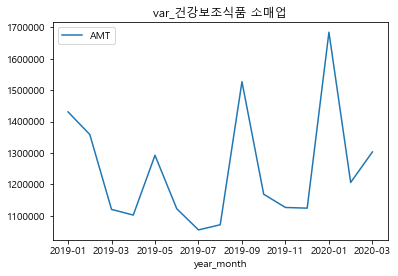

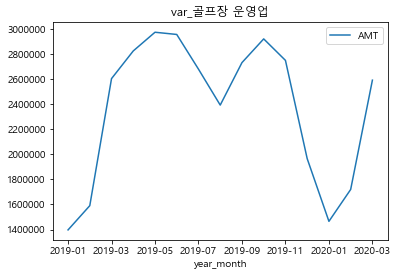

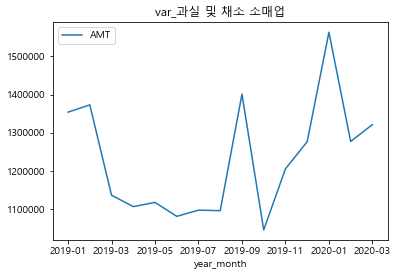

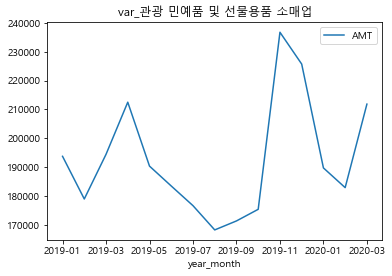

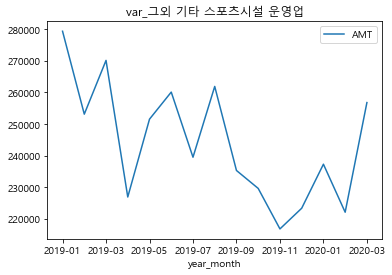

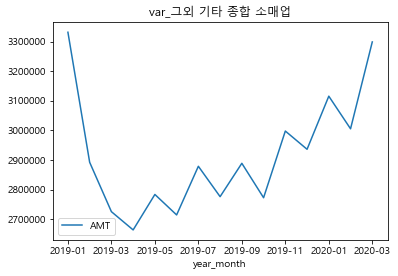

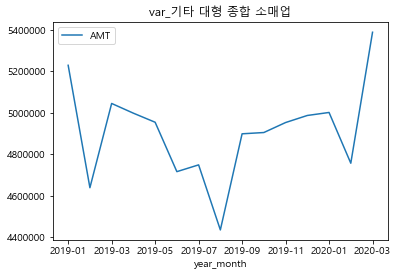

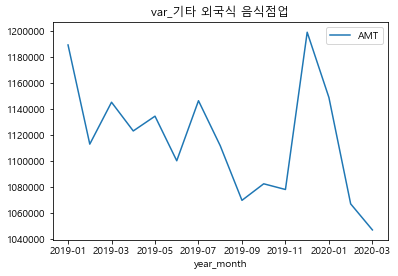

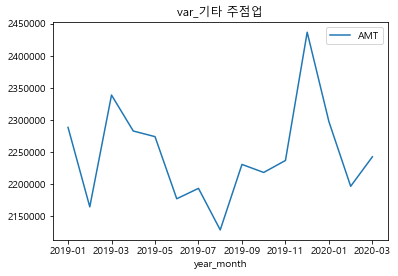

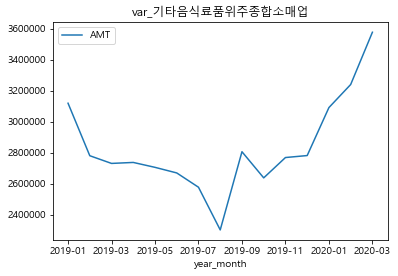

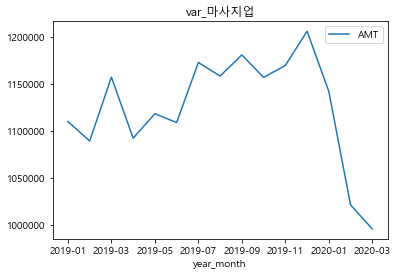

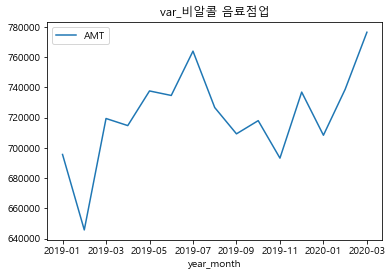

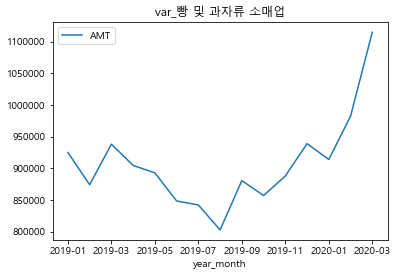

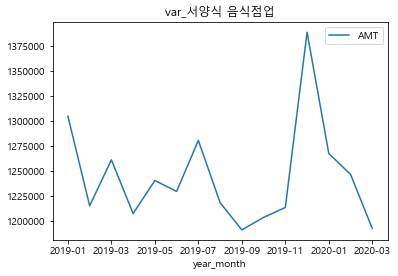

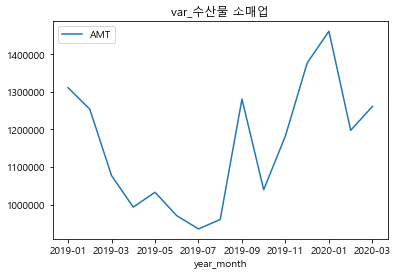

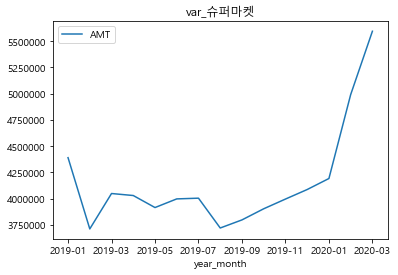

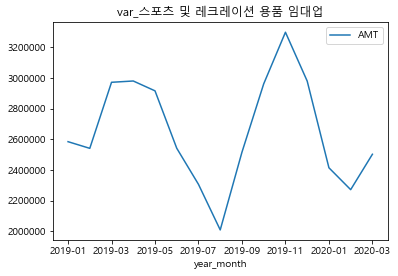

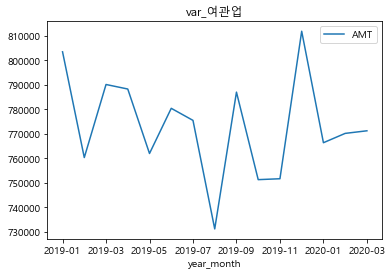

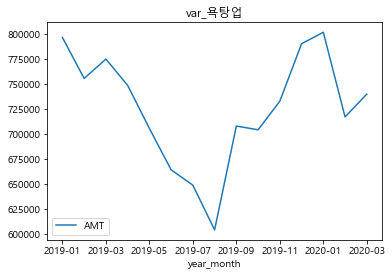

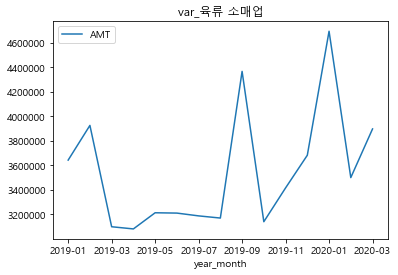

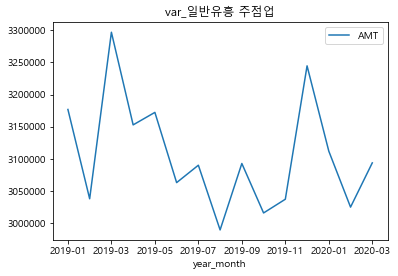

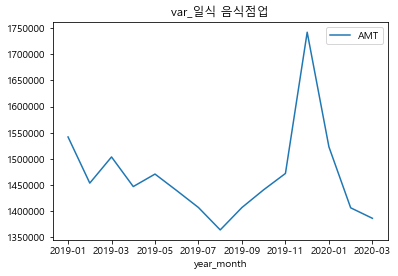

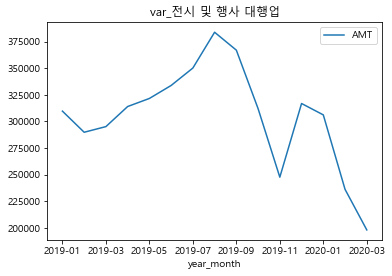

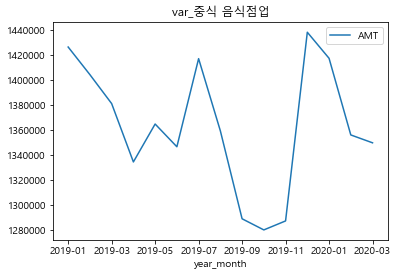

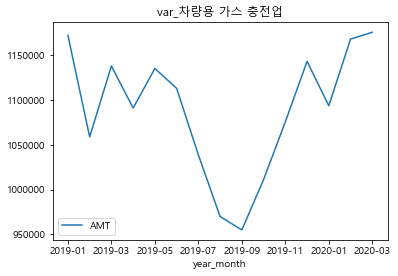

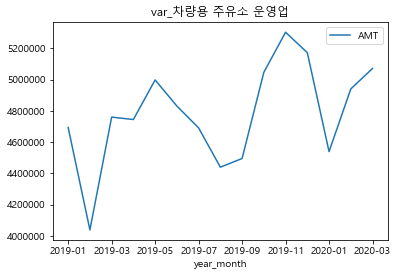

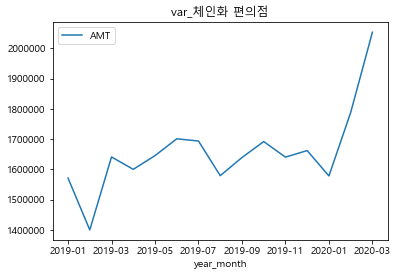

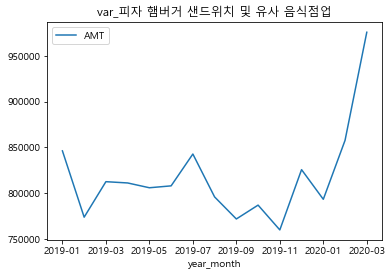

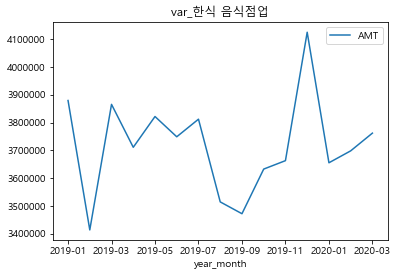

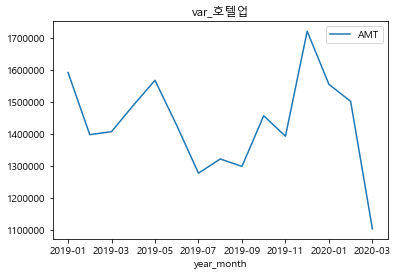

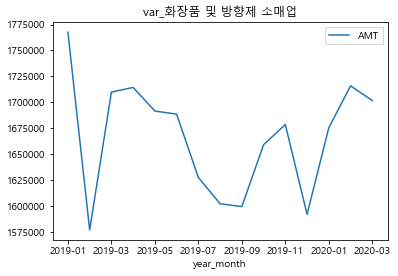

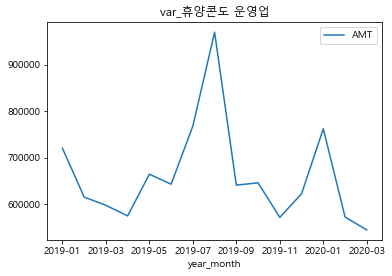

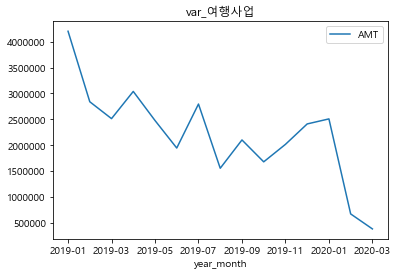

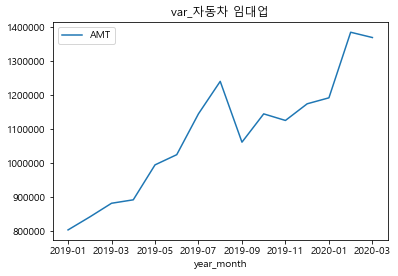

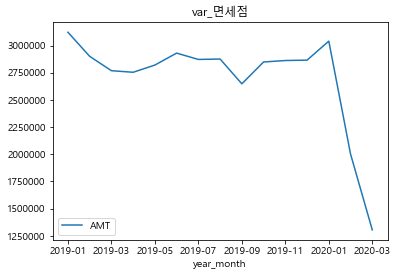

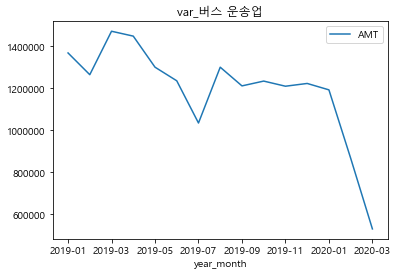

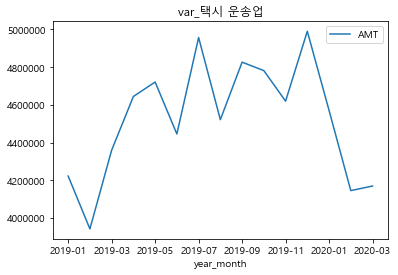

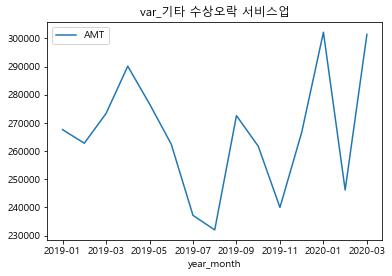

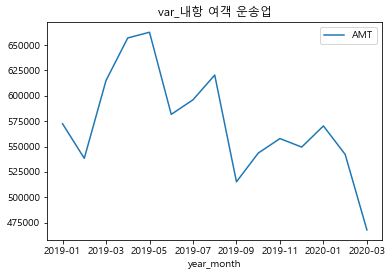

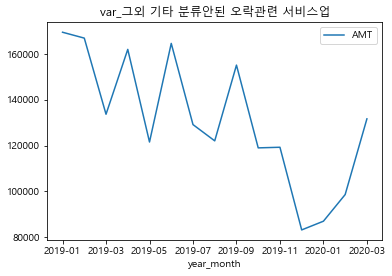

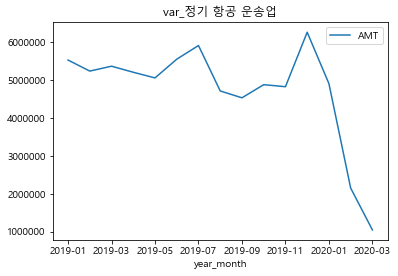

In [51]:
a=[]
b=[]
for i in CLSS_NM_uniq :
#     print('var_{}'.format(i))
    a.append('var_{}'.format(i))
    b.append('var_{}'.format(i))

for i in range(len(CLSS_NM_uniq)) :
    c=b[i]    
    a[i]=std_class_amt_mean.loc[CLSS_NM_uniq[i]]
    
    
    a[i].plot(kind='line')
    
    plt.title(c)

In [52]:
std_class_cnt=train[['year_month','STD_CLSS_NM','CNT']].groupby(['STD_CLSS_NM','year_month']).sum()

C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.f

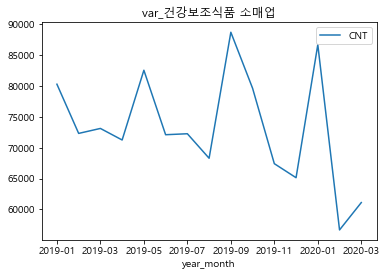

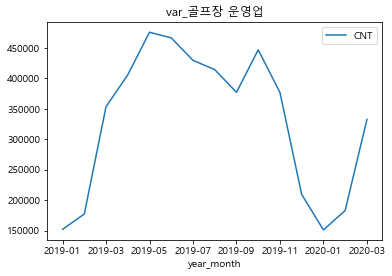

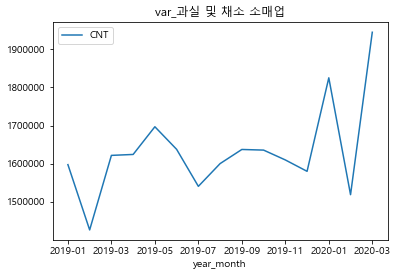

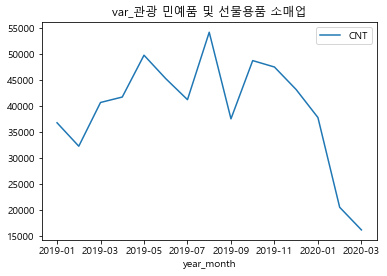

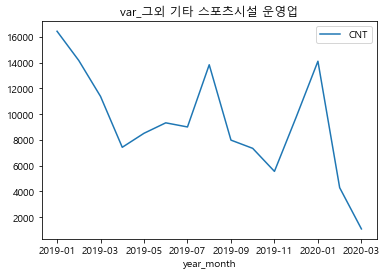

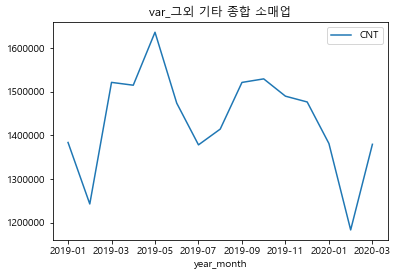

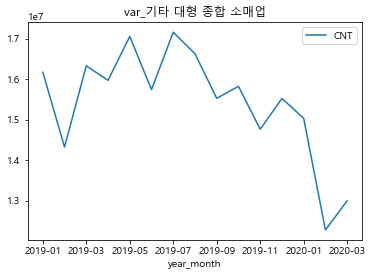

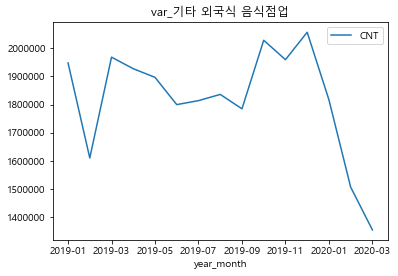

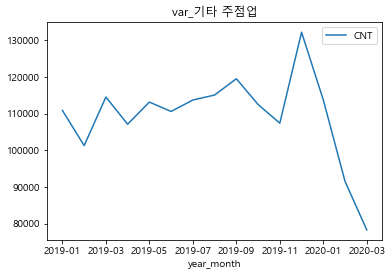

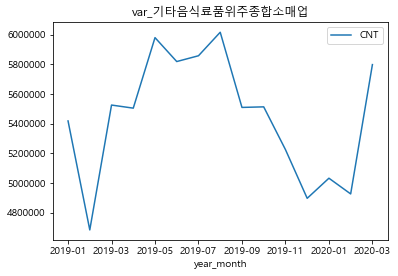

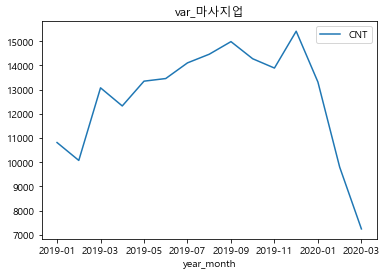

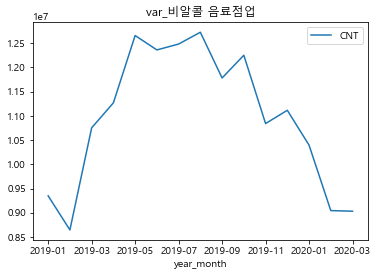

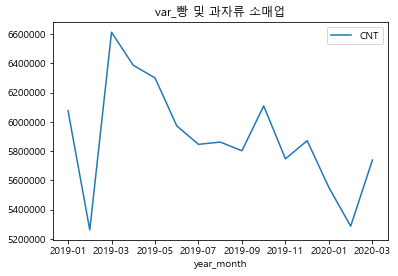

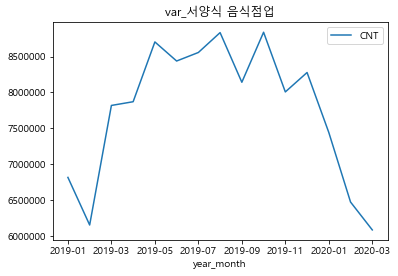

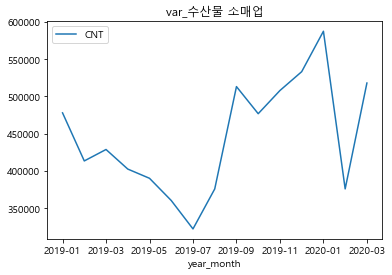

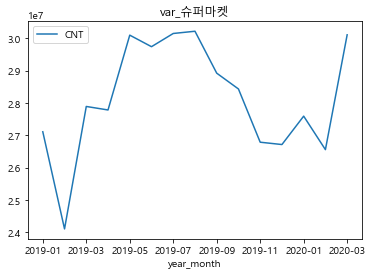

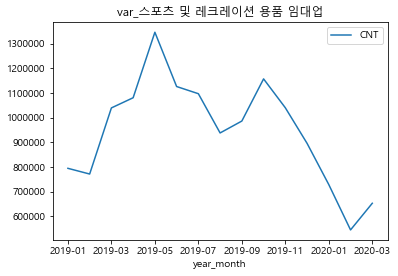

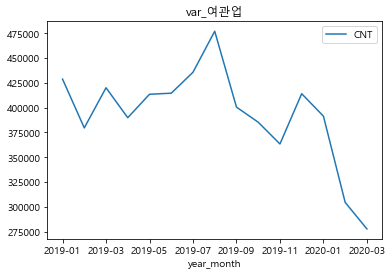

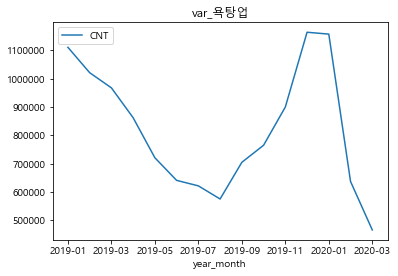

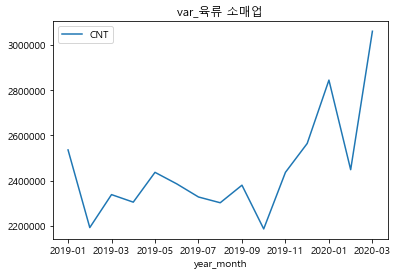

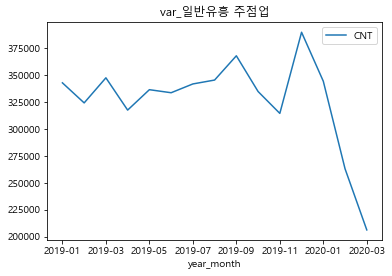

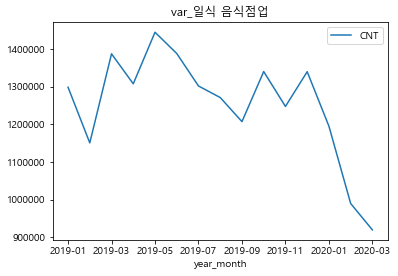

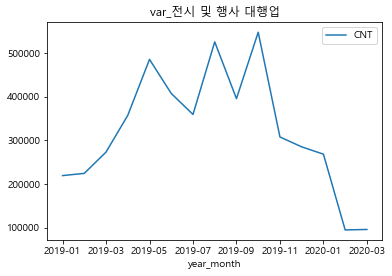

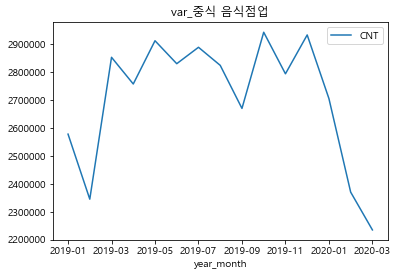

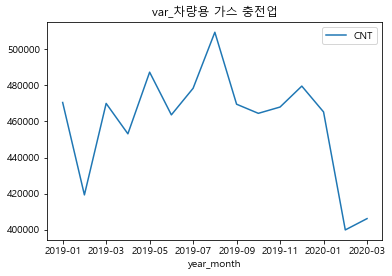

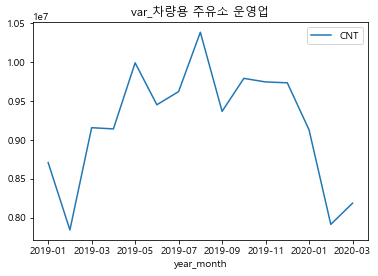

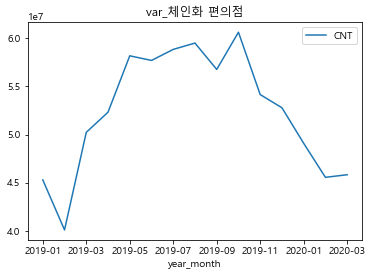

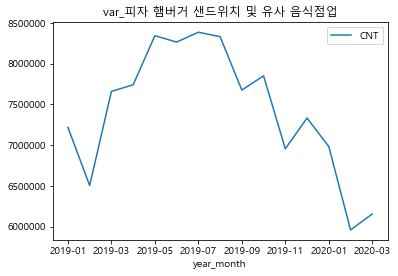

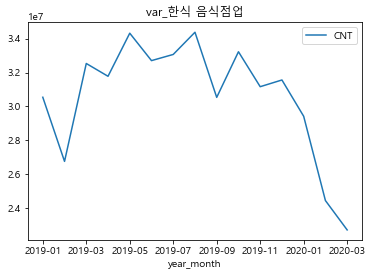

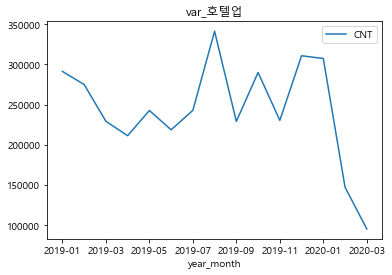

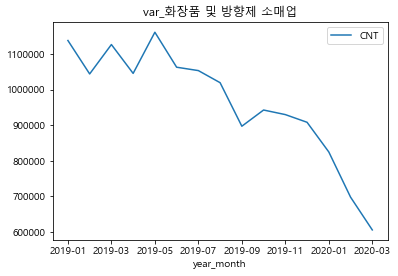

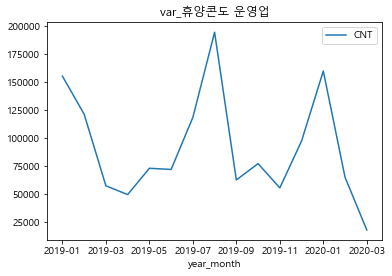

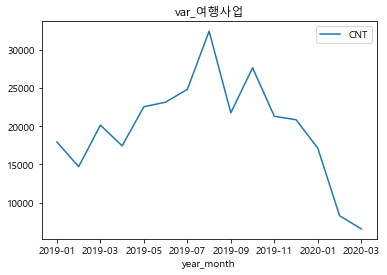

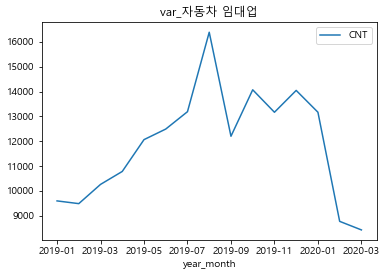

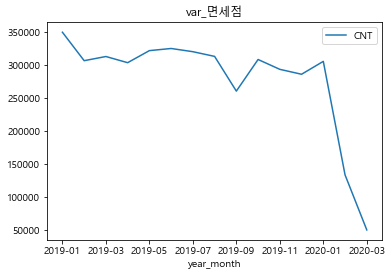

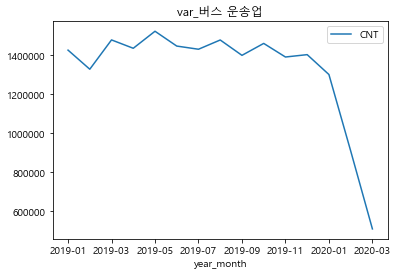

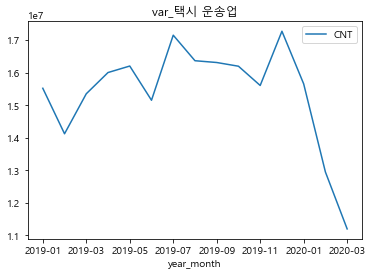

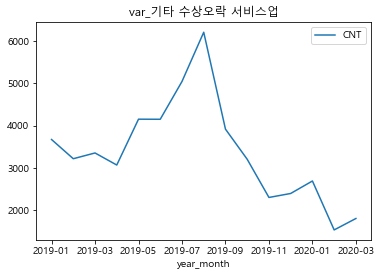

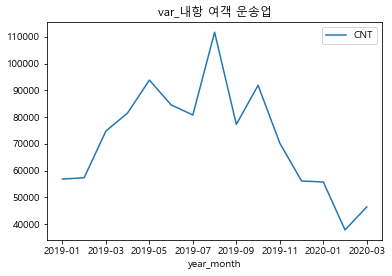

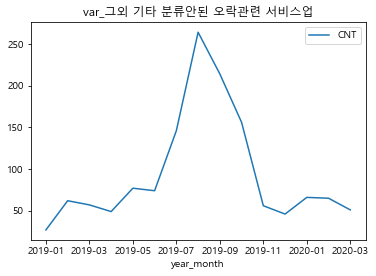

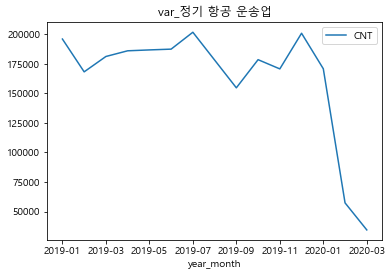

In [53]:
a=[]
b=[]
for i in CLSS_NM_uniq :
#     print('var_{}'.format(i))
    a.append('var_{}'.format(i))
    b.append('var_{}'.format(i))

for i in range(len(CLSS_NM_uniq)) :
    c=b[i]    
    a[i]=std_class_cnt.loc[CLSS_NM_uniq[i]]
    
    
    a[i].plot(kind='line')
    
    plt.title(c)